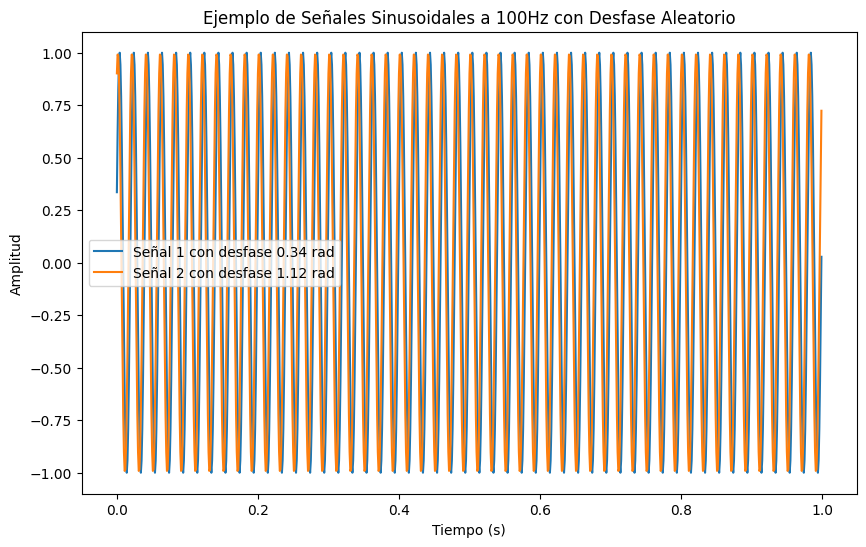

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
num_signals = 1000
fs = 1000  # Frecuencia de muestreo en Hz
f = 50    # Frecuencia de la señal en Hz
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

# Generar 1000 señales con desfase aleatorio
phase_shifts = np.random.uniform(0, 2*np.pi, num_signals)  # Desfases aleatorios
clean_signals = np.sin(2 * np.pi * f * t[:, None] + phase_shifts)

# Visualizar algunas de las señales
plt.figure(figsize=(10, 6))
for i in range(2):  # Mostrar solo 5 señales para evitar saturar la gráfica
    plt.plot(t, clean_signals[:, i], label=f'Señal {i+1} con desfase {phase_shifts[i]:.2f} rad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ejemplo de Señales Sinusoidales a 100Hz con Desfase Aleatorio')
plt.legend()
plt.show()

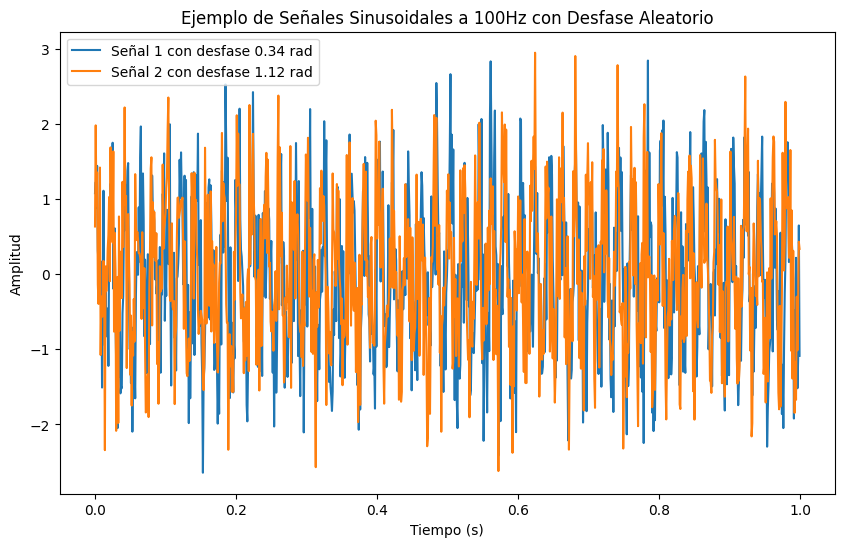

In [2]:
snr_db = 0  # Factor de ruido


signal_power = np.mean(clean_signals**2, axis=0)
noise_power = signal_power / (10**(snr_db / 10))

noisy_signals = clean_signals + np.random.normal(0, np.sqrt(noise_power), clean_signals.shape)

# División en datos de entrenamiento y de prueba
split_index = int(num_signals * 0.8)
x_train = noisy_signals[:, :split_index].T
y_train = clean_signals[:, :split_index].T
x_test = noisy_signals[:, split_index:].T
y_test = clean_signals[:, split_index:].T


plt.figure(figsize=(10, 6))
for i in range(2):  # Mostrar solo 5 señales para evitar saturar la gráfica
    plt.plot(t, noisy_signals[:, i], label=f'Señal {i+1} con desfase {phase_shifts[i]:.2f} rad')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Ejemplo de Señales Sinusoidales a 100Hz con Desfase Aleatorio')
plt.legend()
plt.show()

NNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import pearsonr


model = Sequential([
    Dense(64, activation='relu', input_shape=(fs,)),
    Dense(64, activation='relu'),
    Dense(fs, activation='linear')
])

# Compilación del modelo
model.compile(optimizer='adam', loss='mse')

# Resumen del modelo
#model.summary()

2024-07-06 10:39:09.851790: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 10:39:09.921489: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-06 10:39:10.024628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 10:39:10.131137: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 10:39:10.131681: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-06 10:39:10.269382: I tensorflow/core/platform/cpu_feature_guard.cc:

In [4]:
# Entrenamiento del modelo
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.4415 - val_loss: 0.0766
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0503 - val_loss: 0.0281
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0188 - val_loss: 0.0209
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - val_loss: 0.0181
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0080 - val_loss: 0.0169
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0059 - val_loss: 0.0153
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0046 - val_loss: 0.0145
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - val_loss: 0.0141
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030 - val_loss: 0.0136
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0132
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021 - val_loss: 0.0129
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018 - val_l

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080 
Test loss: 0.008135359734296799
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


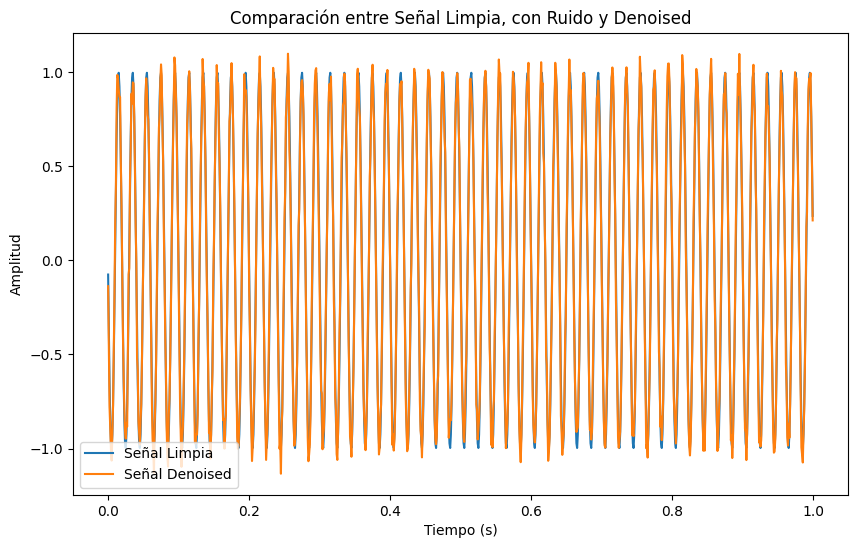

Average RMSE: 0.08540633091502586
Average Correlation: 0.9949667593812266


In [5]:
# Evaluación del modelo
test_loss = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)

# Predicción de señales denoised
predicted_signals = model.predict(x_test)

# Visualización de los resultados
plt.figure(figsize=(10, 6))
plt.plot(t, y_test[0], label='Señal Limpia')
#plt.plot(t, x_test[0], label='Señal con Ruido', alpha=0.5)
plt.plot(t, predicted_signals[0], label='Señal Denoised')
plt.legend()
plt.title('Comparación entre Señal Limpia, con Ruido y Denoised')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


rmses = []
correlations = []
for i in range(predicted_signals.shape[0]):
    rmse = np.sqrt(np.mean(np.power(y_test[i]-predicted_signals[i],2)))
    rmses.append(rmse)
    correlation, _ = pearsonr(y_test[i], predicted_signals[i])
    correlations.append(correlation)

# Calcular promedios
average_rmse = np.mean(rmses)
average_correlation = np.mean(correlations)

print(f'Average RMSE: {average_rmse}')
print(f'Average Correlation: {average_correlation}')




Recurrent:

In [6]:
from tensorflow.keras.callbacks import Callback
from tqdm import tqdm

class TQDMProgressBar(Callback):
    def on_train_begin(self, logs=None):
        self.bar = tqdm(total=self.params['epochs'] * self.params['steps'], desc='Training Progress', position=0, leave=True)

    def on_batch_end(self, batch, logs=None):
        self.bar.update(1)

    def on_train_end(self, logs=None):
        self.bar.close()
        print("Training complete")


In [7]:


noise_levels = -1 * np.arange(0,21,1)
training_signals = np.logspace(start=1, stop=6, num=6, base=10)

corr_matrix = np.zeros((noise_levels.shape[0],training_signals.shape[0]))
rmse_matrix = np.zeros((noise_levels.shape[0],training_signals.shape[0]))

print(noise_levels)
print(training_signals)
for noise_idx,snr in enumerate(noise_levels):

    for number_sessions_idx, number_sessions in enumerate(training_signals):

        # Parámetros
        fs = 1000  # Frecuencia de muestreo en Hz
        f = 50    # Frecuencia de la señal en Hz
        t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo

        # Generar 1000 señales con desfase aleatorio
        phase_shifts = np.random.uniform(0, 2*np.pi, int(number_sessions))  # Desfases aleatorios
        clean_signals = np.sin(2 * np.pi * f * t[:, None] + phase_shifts)


        snr_db = snr  # Factor de ruido


        signal_power = np.mean(clean_signals**2, axis=0)
        noise_power = signal_power / (10**(snr_db / 10))
        noisy_signals = clean_signals + np.random.normal(0, np.sqrt(noise_power), clean_signals.shape)

        # División en datos de entrenamiento y de prueba
        split_index = int(number_sessions * 0.8)
        x_train = noisy_signals[:, :split_index].T
        y_train = clean_signals[:, :split_index].T
        x_test = noisy_signals[:, split_index:].T
        y_test = clean_signals[:, split_index:].T


        tqdm_callback = TQDMProgressBar()
        history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=0,callbacks=[tqdm_callback])

        # Evaluación del modelo
        test_loss = model.evaluate(x_test, y_test)
        print('Test loss:', test_loss)

        # Predicción de señales denoised
        predicted_signals = model.predict(x_test)

        rmse = []
        correlations = []
        for i in range(predicted_signals.shape[0]):
            rmse = np.sqrt(np.mean(np.power(y_test[i]-predicted_signals[i],2)))
            rmses.append(rmse)
            correlation, _ = pearsonr(y_test[i], predicted_signals[i])
            correlations.append(correlation)

        # Calcular promedios
        average_rmse = np.mean(rmses)
        average_correlation = np.mean(correlations)

        corr_matrix[noise_idx,number_sessions_idx] = average_correlation
        rmse_matrix[noise_idx,number_sessions_idx] = average_rmse

        print("Params -> SNR: " + str(snr) + " #Training sessions: " +str(number_sessions ))
        print(f'Average RMSE: {average_rmse}')
        print(f'Average Correlation: {average_correlation}')


[  0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -16 -17
 -18 -19 -20]
[1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]


Training Progress: 100%|██████████| 50/50 [00:02<00:00, 21.37it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0109
Test loss: 0.010946772992610931
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


Params -> SNR: 0 #Training sessions: 10.0
Average RMSE: 0.08559097848034711
Average Correlation: 0.9906296884060091


Training Progress: 100%|██████████| 150/150 [00:02<00:00, 72.67it/s]

Training complete
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0051
Test loss: 0.005136232823133469
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Params -> SNR: 0 #Training sessions: 100.0
Average RMSE: 0.08402094627723894
Average Correlation: 0.9962863949743346


Training Progress: 100%|██████████| 1250/1250 [00:04<00:00, 278.53it/s]


Training complete
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 
Test loss: 0.0035767024382948875
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Params -> SNR: 0 #Training sessions: 1000.0
Average RMSE: 0.06990886414252227
Average Correlation: 0.9981558690610944


Training Progress: 100%|██████████| 12500/12500 [00:26<00:00, 465.16it/s]

Training complete
 1/63 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0018
Test loss: 0.0018145289504900575
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Params -> SNR: 0 #Training sessions: 10000.0
Average RMSE: 0.043220978381502975
Average Correlation: 0.9990238789531531


Training Progress: 100%|██████████| 125000/125000 [04:13<00:00, 493.82it/s]


Training complete
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0011
Test loss: 0.0010612762998789549
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Params -> SNR: 0 #Training sessions: 100000.0
Average RMSE: 0.029681075736702336
Average Correlation: 0.9991767184193674


In [ ]:
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='viridis', extent=[noise_levels.min(), noise_levels.max(), training_signals.min(), training_signals.max()], aspect='auto')
plt.colorbar()
plt.title('Visualización de Matriz de Correlación con Colores')
plt.xlabel('Niveles de Ruido')
plt.ylabel('Señales de Entrenamiento')
plt.xticks(np.round(np.linspace(noise_levels.min(), noise_levels.max(), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.yticks(np.round(np.logspace(np.log10(training_signals.min()), np.log10(training_signals.max()), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.xscale('linear')  # O 'log' si noise_levels es logarítmico
plt.yscale('log')  # Si training_signals es logarítmico
plt.grid(True)
plt.show()

# Visualización de rmse_matrix
plt.figure(figsize=(8, 6))
plt.imshow(rmse_matrix, cmap='viridis', extent=[noise_levels.min(), noise_levels.max(), training_signals.min(), training_signals.max()], aspect='auto')
plt.colorbar()
plt.title('Visualización de Matriz RMSE con Colores')
plt.xlabel('Niveles de Ruido')
plt.ylabel('Señales de Entrenamiento')
plt.xticks(np.round(np.linspace(noise_levels.min(), noise_levels.max(), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.yticks(np.round(np.logspace(np.log10(training_signals.min()), np.log10(training_signals.max()), num=5), 2))  # Ajusta el número de ticks si es necesario
plt.xscale('linear')  # O 'log' si noise_levels es logarítmico
plt.yscale('log')  # Si training_signals es logarítmico
plt.grid(True)
plt.show()